<a href="https://colab.research.google.com/github/vowkvns/class_4aidl/blob/main/week6/chapter05_fundamentals_of_ml_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [ ]:
import numpy as np

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [ ]:
np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.6208 - accuracy: 0.8099 - val_loss: 0.2551 - val_accuracy: 0.9241
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2547 - accuracy: 0.9226 - val_loss: 0.1848 - val_accuracy: 0.9446
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1689 - accuracy: 0.9486 - val_loss: 0.1777 - val_accuracy: 0.9464
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1205 - accuracy: 0.9630 - val_loss: 0.1510 - val_accuracy: 0.9545
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0892 - accuracy: 0.9720 - val_loss: 0.1316 - val_accuracy: 0.9618
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0654 - accuracy: 0.9791 - val_loss: 0.1402 - val_accuracy: 0.9607
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.1671 - val_accuracy: 0.9517
Epoch 

In [5]:
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2933 - accuracy: 0.9157 - val_loss: 0.1552 - val_accuracy: 0.9578
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1238 - accuracy: 0.9639 - val_loss: 0.1076 - val_accuracy: 0.9691
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0820 - accuracy: 0.9761 - val_loss: 0.0964 - val_accuracy: 0.9720
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0586 - accuracy: 0.9828 - val_loss: 0.0880 - val_accuracy: 0.9745
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.0768 - val_accuracy: 0.9783
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0330 - accuracy: 0.9905 - val_loss: 0.0738 - val_accuracy: 0.9792
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0248 - accuracy: 0.9933 - val_loss: 0.0749 - val_accuracy: 0.9793
Epoch 

**Plotting a validation accuracy comparison**

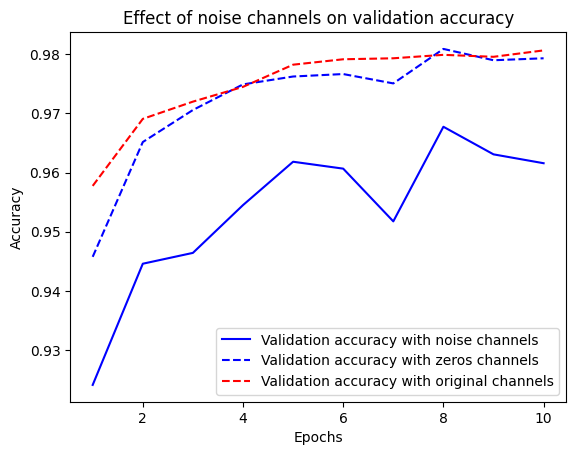

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc= history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc, "r--", label="Validation accuracy with original channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model1 = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3146 - accuracy: 0.1033 - val_loss: 2.3043 - val_accuracy: 0.1063
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2997 - accuracy: 0.1162 - val_loss: 2.3133 - val_accuracy: 0.1002
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2917 - accuracy: 0.1277 - val_loss: 2.3184 - val_accuracy: 0.0978
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2798 - accuracy: 0.1372 - val_loss: 2.3292 - val_accuracy: 0.1031
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2650 - accuracy: 0.1510 - val_loss: 2.3282 - val_accuracy: 0.1038
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2459 - accuracy: 0.1637 - val_loss: 2.3468 - val_accuracy: 0.1025
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2229 - accuracy: 0.1787 - val_loss: 2.3567 - val_accuracy: 0.1036

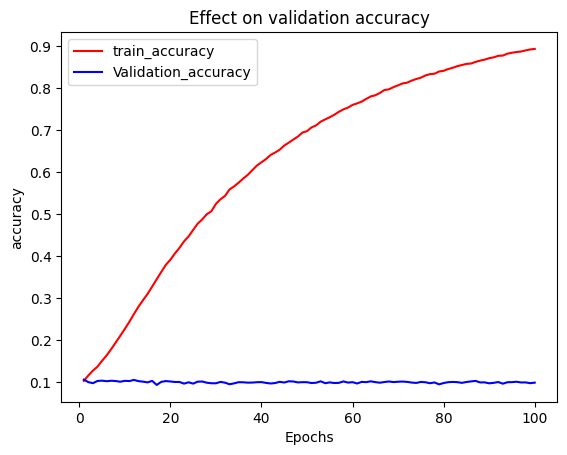

In [8]:
import matplotlib.pyplot as plt
train_acc = model1.history["accuracy"]
val_acc = model1.history["val_accuracy"]

epochs = range(1, 101)

plt.plot(epochs, train_acc, "r-",
         label="train_accuracy")

plt.plot(epochs, val_acc, "b-",
         label="Validation_accuracy")

plt.title("Effect on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 828.6201 - accuracy: 0.2885 - val_loss: 2.4487 - val_accuracy: 0.2029
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.5259 - accuracy: 0.1986 - val_loss: 2.0530 - val_accuracy: 0.2333
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4803 - accuracy: 0.2013 - val_loss: 2.1834 - val_accuracy: 0.1745
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1013 - accuracy: 0.1931 - val_loss: 2.1721 - val_accuracy: 0.1954
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3610 - accuracy: 0.2005 - val_loss: 2.3105 - val_accuracy: 0.1941
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2961 - accuracy: 0.2044 - val_loss: 2.2148 - val_accuracy: 0.1885
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4252 - accuracy: 0.1884 - val_loss: 2.1960 - val_accuracy: 0.2058
Epoc

**The same model with a more appropriate learning rate**

In [10]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.3500 - accuracy: 0.9120 - val_loss: 0.1612 - val_accuracy: 0.9563
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1261 - accuracy: 0.9651 - val_loss: 0.1300 - val_accuracy: 0.9688
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0947 - accuracy: 0.9750 - val_loss: 0.1547 - val_accuracy: 0.9671
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9791 - val_loss: 0.1574 - val_accuracy: 0.9691
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9828 - val_loss: 0.1814 - val_accuracy: 0.9688
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0560 - accuracy: 0.9859 - val_loss: 0.1767 - val_accuracy: 0.9740
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0596 - accuracy: 0.9866 - val_loss: 0.1721 - val_accuracy: 0.9729
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [11]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6764 - accuracy: 0.8329 - val_loss: 0.3622 - val_accuracy: 0.9025
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3548 - accuracy: 0.9024 - val_loss: 0.3110 - val_accuracy: 0.9149
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3193 - accuracy: 0.9119 - val_loss: 0.2939 - val_accuracy: 0.9178
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3029 - accuracy: 0.9154 - val_loss: 0.2851 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2929 - accuracy: 0.9185 - val_loss: 0.2790 - val_accuracy: 0.9219
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2860 - accuracy: 0.9202 - val_loss: 0.2757 - val_accuracy: 0.9245
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.9215 - val_loss: 0.2730 - val_accuracy: 0.9253
Epoch 

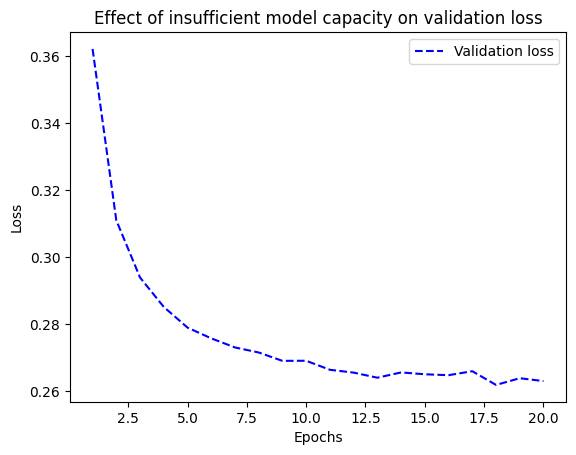

In [12]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [13]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3665 - accuracy: 0.8971 - val_loss: 0.1835 - val_accuracy: 0.9469
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1590 - accuracy: 0.9530 - val_loss: 0.1293 - val_accuracy: 0.9632
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1129 - accuracy: 0.9660 - val_loss: 0.1204 - val_accuracy: 0.9650
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0882 - accuracy: 0.9735 - val_loss: 0.1042 - val_accuracy: 0.9701
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0713 - accuracy: 0.9789 - val_loss: 0.0945 - val_accuracy: 0.9724
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0589 - accuracy: 0.9818 - val_loss: 0.0925 - val_accuracy: 0.9740
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0889 - val_accuracy: 0.9768
Epoch 

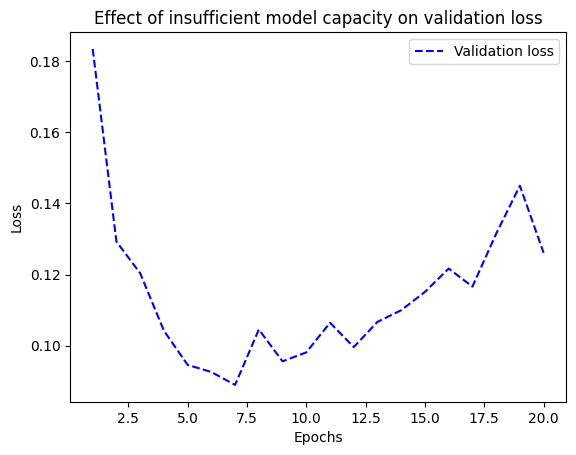

In [14]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 68ms/step - loss: 0.5466 - accuracy: 0.7750 - val_loss: 0.4203 - val_accuracy: 0.8558
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3441 - accuracy: 0.8897 - val_loss: 0.3297 - val_accuracy: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2571 - accuracy: 0.9135 - val_loss: 0.2931 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2073 - accuracy: 0.9285 - val_loss: 0.2768 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1731 - accuracy: 0.9419 - val_loss: 0.2765 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1485 - accuracy: 0.9523 - val_loss: 0.2875 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1310 - accuracy: 0.9564 - val_loss: 0.2904 - val_accuracy: 0.8863
Epoch 8/20
30

**Version of the model with lower capacity**

In [16]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6419 - accuracy: 0.6142 - val_loss: 0.5818 - val_accuracy: 0.7505
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5462 - accuracy: 0.7713 - val_loss: 0.5293 - val_accuracy: 0.7631
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4938 - accuracy: 0.8361 - val_loss: 0.4968 - val_accuracy: 0.8189
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4556 - accuracy: 0.8775 - val_loss: 0.4755 - val_accuracy: 0.8659
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4270 - accuracy: 0.9042 - val_loss: 0.4693 - val_accuracy: 0.8349
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4034 - accuracy: 0.9237 - val_loss: 0.4531 - val_accuracy: 0.8659
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3838 - accuracy: 0.9379 - val_loss: 0.4556 - val_accuracy: 0.8561
Epoch 8/20
30

**Version of the model with higher capacity**

In [17]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5668 - accuracy: 0.7265 - val_loss: 0.5015 - val_accuracy: 0.7534
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3216 - accuracy: 0.8698 - val_loss: 0.2862 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2419 - accuracy: 0.9041 - val_loss: 0.2876 - val_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1883 - accuracy: 0.9251 - val_loss: 0.2869 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1432 - accuracy: 0.9445 - val_loss: 0.2902 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1166 - accuracy: 0.9555 - val_loss: 0.3011 - val_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0840 - accuracy: 0.9720 - val_loss: 0.3497 - val_accuracy: 0.8872
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [26]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.6066 - accuracy: 0.7861 - val_loss: 0.4803 - val_accuracy: 0.8602
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4098 - accuracy: 0.8884 - val_loss: 0.3946 - val_accuracy: 0.8804
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3374 - accuracy: 0.9100 - val_loss: 0.3731 - val_accuracy: 0.8827
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2990 - accuracy: 0.9242 - val_loss: 0.3643 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2784 - accuracy: 0.9314 - val_loss: 0.3539 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2597 - accuracy: 0.9381 - val_loss: 0.3604 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2499 - accuracy: 0.9421 - val_loss: 0.3937 - val_accuracy: 0.8706
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [27]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.6291 - accuracy: 0.6412 - val_loss: 0.5148 - val_accuracy: 0.8230
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5103 - accuracy: 0.7682 - val_loss: 0.4214 - val_accuracy: 0.8730
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4327 - accuracy: 0.8247 - val_loss: 0.3545 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3814 - accuracy: 0.8535 - val_loss: 0.3172 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3327 - accuracy: 0.8759 - val_loss: 0.2941 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2941 - accuracy: 0.8987 - val_loss: 0.2771 - val_accuracy: 0.8915
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2639 - accuracy: 0.9071 - val_loss: 0.2763 - val_accuracy: 0.8925
Epoch 8/20
30

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_origin = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5340 - accuracy: 0.7769 - val_loss: 0.4139 - val_accuracy: 0.8515
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3319 - accuracy: 0.8923 - val_loss: 0.3186 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2516 - accuracy: 0.9157 - val_loss: 0.2879 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2008 - accuracy: 0.9337 - val_loss: 0.2744 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1685 - accuracy: 0.9446 - val_loss: 0.2762 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1449 - accuracy: 0.9524 - val_loss: 0.2880 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1242 - accuracy: 0.9599 - val_loss: 0.3005 - val_accuracy: 0.8845
Epoch 8/20
30

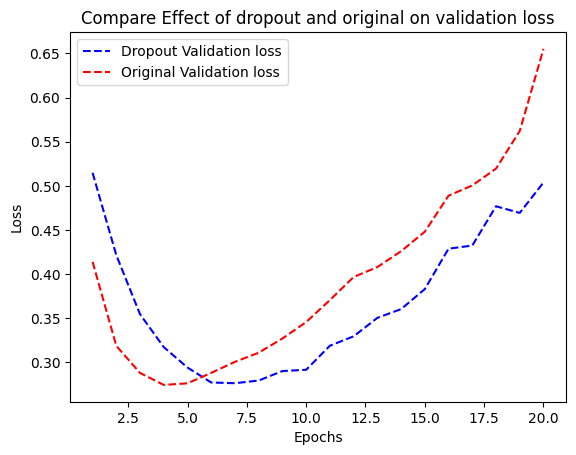

In [22]:
import matplotlib.pyplot as plt
Dropout_val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, Dropout_val_loss, "b--",
         label="Dropout Validation loss")
Origin_val_loss = history_origin.history["val_loss"]
plt.plot(epochs, Origin_val_loss, "r--",
         label="Original Validation loss")
plt.title("Compare Effect of dropout and original on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



## Summary